In [3]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

import spectral as sp
import pysptools.spectro as spectro

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [50, 30]
plt.rcParams['figure.dpi'] = 600
kwargs = {'linestyle':':'}

# Spectral analysis of CCA
- Datasets:
    - Reflectance images
    - Double Derivative
- Plot a region of only CCA

In [2]:
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-Reflectance")
sg_files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-SG-Reflectance")

hdr_list = list(files_path.glob('*.hdr'))
bin_list = list(files_path.glob('*.img'))

sg_hdr_list = list(sg_files_path.glob('*.hdr'))
sg_bin_list = list(sg_files_path.glob('*.img'))

targets = list(zip(hdr_list,bin_list))
sg_targets = list(zip(sg_hdr_list, sg_bin_list))

In [3]:
i = 8
targets[i][1]

WindowsPath('C:/Users/jcmontes/OneDrive - University of Tasmania/01_Projects_Drive/Imaging_spectroscopy/Phenotyping_macroalgae/data/NIWA-Antarctic-CCA/Kestrel-Reflectance/NIWA-CCA_GHN-04_2004-08-06_02-42-27_reflectance.img')

In [4]:
target_open = sp.envi.open(targets[i][0], targets[i][1])
target_data = target_open.load()

ImageView object:
  Display bands       :  [144, 92, 42]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.9560787081718445]
    G: [0.0, 0.9664413332939148]
    B: [0.0, 1.0209203958511353]

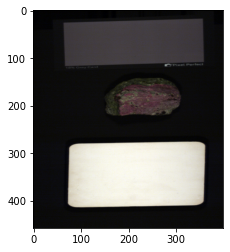

In [5]:
%matplotlib inline
sp.imshow(target_data)

In [6]:
# Cropping cell after matplotlib notebook
target_crop = target_data[125:240,135:320,20:200]
#target_crop = target_data[125:240,135:320,:]

ImageView object:
  Display bands       :  (95, 42, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.010816684924066067, 0.5246092081069946]
    G: [0.0, 0.4457857608795166]
    B: [0.0, 0.42791128158569336]

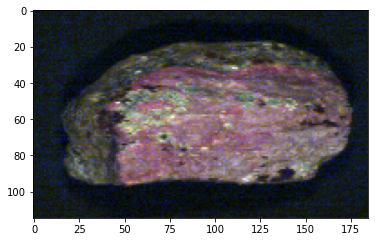

In [7]:
%matplotlib inline
sp.imshow(target_crop, (95,42,2))
#sp.imshow(target_crop, (144,92,42))
#plt.savefig(str(files_path) + '/' + 'GN04.png', dpi = 600)

In [9]:
target_crop

ImageArray([[[0.0453036  0.02772829 0.06497082 ... 0.04558841 0.04662436
              0.04871169]
             [0.09537601 0.09473832 0.         ... 0.04614436 0.04162889
              0.04760461]
             [0.07391641 0.03928174 0.1254609  ... 0.04864617 0.04523673
              0.05120263]
             ...
             [0.12160441 0.06932072 0.         ... 0.04781223 0.04606931
              0.04566721]
             [0.0906072  0.09242763 0.08065344 ... 0.04419852 0.04523673
              0.05009555]
             [0.071532   0.04621381 0.06497082 ... 0.04753425 0.04856704
              0.04566721]]], dtype=float32)

spectral:INFO: k-means iteration 1 - 10637 pixels reassigned.
spectral:INFO: k-means iteration 2 - 1196 pixels reassigned.
spectral:INFO: k-means iteration 3 - 783 pixels reassigned.
spectral:INFO: k-means iteration 4 - 655 pixels reassigned.
spectral:INFO: k-means iteration 5 - 630 pixels reassigned.
spectral:INFO: k-means iteration 6 - 623 pixels reassigned.
spectral:INFO: k-means iteration 7 - 516 pixels reassigned.
spectral:INFO: k-means iteration 8 - 427 pixels reassigned.
spectral:INFO: k-means iteration 9 - 355 pixels reassigned.
spectral:INFO: k-means iteration 10 - 299 pixels reassigned.
spectral:INFO: k-means iteration 11 - 211 pixels reassigned.
spectral:INFO: k-means iteration 12 - 178 pixels reassigned.
spectral:INFO: k-means iteration 13 - 163 pixels reassigned.
spectral:INFO: k-means iteration 14 - 124 pixels reassigned.
spectral:INFO: k-means iteration 15 - 95 pixels reassigned.
spectral:INFO: kmeans terminated with 5 clusters after 15 iterations.


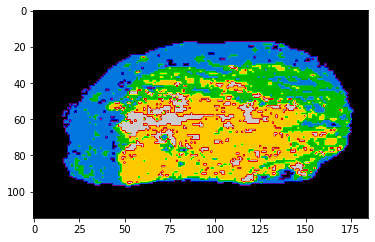

In [8]:
(class_map,cluster_centers) = sp.kmeans(target_crop,5,15)
plt.imshow(class_map,cmap = 'nipy_spectral')

In [10]:
class_map.shape

(115, 185)

In [11]:
cluster_centers.shape

(5, 180)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


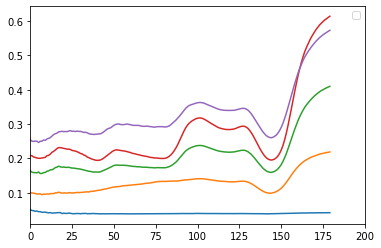

In [14]:
for i in range(cluster_centers.shape[0]):
    plt.plot(cluster_centers[i,:])
    plt.xlim(0,200)
plt.legend()

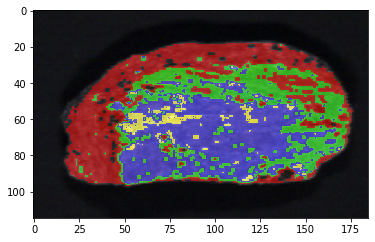

In [15]:
view = sp.imshow(target_crop, (99,92,62), classes = class_map)
view.set_display_mode('overlay')
#view.class_alpha = 0.5 #transparency
#view.show_data

## Principal Components

In [28]:
pc = sp.principal_components(target_crop)
pc_99 = pc.reduce(fraction=0.99) # 0.999 = 46, 0.998 = 30
len(pc_99.eigenvalues)

7

In [29]:
target_pc = pc_99.transform(target_crop)

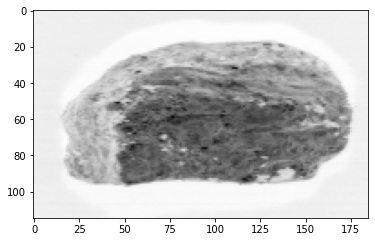

In [30]:
v = sp.imshow(target_pc[:,:,0], stretch_all=True)

# Convex Hull Removal
- Selection of interesting areas

In [104]:
cca_sample = target_crop[60:70,90:100,:]
bcca_sample = target_crop[40:45,90:95,:]

In [ ]:
pysptools.spectro.convex_hull_removal(pixel, wvl)

## Minimum Noise Fraction

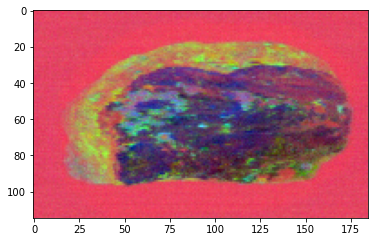

In [98]:
signal = sp.calc_stats(target_crop,allow_nan=True)
noise = sp.noise_from_diffs(target_crop)
mnfr = sp.mnf(signal, noise)
reduced = mnfr.reduce(target_crop,num=5)
v=sp.imshow(reduced[:,:,:3])

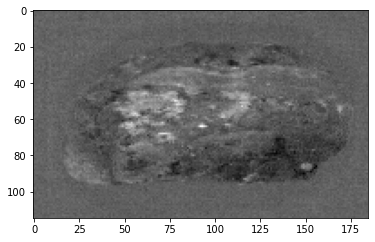

In [110]:
v=sp.imshow(reduced[:,:,2])

In [7]:
#t = 0.001 #threshold for shadows
#target_data = (target_data > t) * target_data

## Binning tests

In [10]:
bands_bin = [float(i) for i in bands_vector]
bands_bin = np.asarray(bands)
bands_bin = bands.reshape(-1,2).mean(axis=1).round(2)
#bands[:(bands.size // 3) * 3].reshape(-1, 3).mean(axis=1).round(2)

NameError: name 'bands' is not defined

In [ ]:
binned = target_data.reshape(-1,2).mean(axis=1)
binned = binned.reshape(target_data.shape[0], target_data.shape[1], -1)

In [ ]:
#bands_bin[59]
bands_bin[40]

# Spectral index analysis

- Random finding:
- Normalized Differenced Who-Knows-What Index
- (bands_vector[118] - bands_vector[81]) / (bands_vector[118] + bands_vector[81])

#### Normalized Differenced Vegetation Index
NDVI = (R800 - R670) / (R800 + R670)

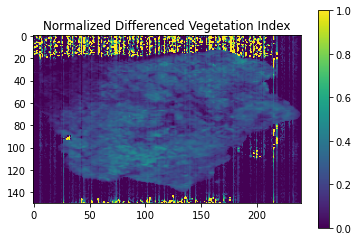

In [18]:
ndvi = (target_data[:,:,237] - target_data[:,:,162]) / (target_data[:,:,237] + target_data[:,:,162])

plt.imshow(ndvi, vmin=0, vmax=1)
plt.title("Normalized Differenced Vegetation Index")
plt.colorbar()

In [9]:
## Bin test
ndvi_bin = (binned[:,:,59] - binned[:,:,40]) / (binned[:,:,59] + binned[:,:,40])

plt.imshow(ndvi_bin, vmin=0.1, vmax=0.5)
plt.title("Normalized Differenced Vegetation Index")
plt.colorbar()

NameError: name 'binned' is not defined

## Notice the edges in the CCA, more chlorophyll maybe?

- Move to derivative section + results
- According to literature different pigments present different absorption peaks.
    - Hedley & Mumby (2002)

In [11]:
# Main absorption peaks of photosynthetic pigments of Rhodophyta from Hedley & Mumby (2002)
# Chlorophyll a
chla = 435; chla2 = 670; chla3 = 680

# Carotenoids
calpha1 = 423; calpha2 = 444; calpha3 = 473; calpha4 = 500

# Xantophylls
zxn1 = 428; zxn2 = 450; zxn3 = 478 # Zeaxanthin
ltn1 = 422; ltn2 = 445; ltn3 = 474 # Lutein

# Phycobilins
pcn = 618 # Phycocyanin
pe1 = 490; pe2 = 546; pe3 = 576 # Phycoerythrin
apcn = 654 # Allophycocyanin

In [12]:
print('ix 10:', bands_vector[10], '50:', bands_vector[50],'100:', bands_vector[100], '200:', bands_vector[200],'300:', bands_vector[300])

ix 10: 411.21 50: 478.95 100: 564.31 200: 736.30 300: 908.21


In [13]:
bands_vector[237]

'800.02'

#### Anthocyanin Reflectance Index
ARI = (1 / R550) - (1 / R700) 

In [14]:
ari_test_1 = np.divide(1, target_data[:,:,92])
ari_test_2 = np.divide(1, target_data[:,:,179])
ari = np.subtract(ari_test_1, ari_test_2)

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\2607219024.py:1: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\2607219024.py:2: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\2607219024.py:3: RuntimeWarning: invalid value encountered in subtract


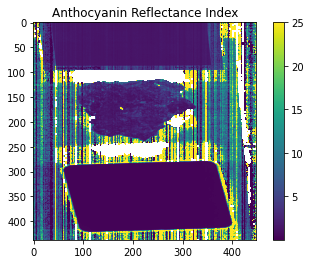

In [15]:
plt.imshow(ari, vmin=0.01, vmax=25)
plt.title("Anthocyanin Reflectance Index")
plt.colorbar()

#### Carotenoid Reflectance Index
CRI700 = (1 / R510) - (1 / R700)

In [16]:
bands_vector[68]

'509.61'

In [17]:
cri700_1 = np.divide(1, target_data[:,:,68])
cri700_2 = np.divide(1, target_data[:,:,179])
cri700 = np.subtract(cri700_1, cri700_2)

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\2155835699.py:1: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\2155835699.py:2: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\2155835699.py:3: RuntimeWarning: invalid value encountered in subtract


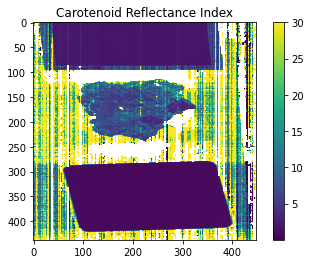

In [18]:
plt.imshow(cri700, vmin=0.01, vmax=30)
plt.title("Carotenoid Reflectance Index")
plt.colorbar()

#### Modified Anthocyanin Reflectance Index
MARI = ((1 / R550) - (1 / R700)) * R800

In [19]:
mari_test_1 = np.divide(1, target_data[:,:,92]) # 550 nm
mari_test_2 = np.divide(1, target_data[:,:,179]) # 700 nm
mari_test_3 = np.subtract(mari_test_1, mari_test_2)
mari = np.multiply(mari_test_3, target_data[:,:,237]) # 800 nm

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\3410040644.py:1: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\3410040644.py:2: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\3410040644.py:3: RuntimeWarning: invalid value encountered in subtract
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\3410040644.py:4: RuntimeWarning: invalid value encountered in multiply


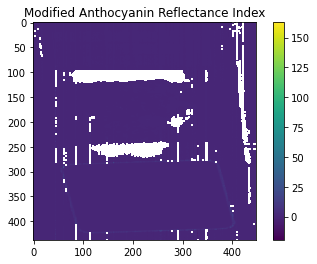

In [20]:
plt.imshow(mari)
plt.title("Modified Anthocyanin Reflectance Index")
plt.colorbar()

#### Photochemical Reflectance Index
PRI = (R531 - R570) / (R531 + R570)

In [21]:
pri_test_1 = np.subtract(target_data[:,:,81], target_data[:,:,103])
pri_test_2 = np.add(target_data[:,:,81], target_data[:,:,103])
pri = np.divide(pri_test_1, pri_test_2)

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\1690211194.py:3: RuntimeWarning: invalid value encountered in true_divide


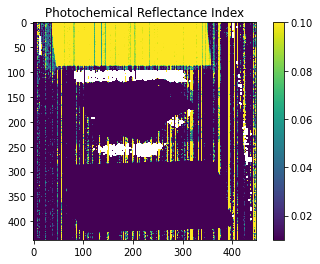

In [22]:
plt.imshow(pri,vmin=0.01, vmax=0.1)
plt.title("Photochemical Reflectance Index")
plt.colorbar()

#### Pigment Specific Normalized Difference for Caroteniods
PSND_CAR = (R800 - R470) / (R800 + R470)

In [23]:
pscar_test_1 = np.subtract(target_data[:,:,237], target_data[:,:,45]) # 800 - 470
pscar_test_2 = np.add(target_data[:,:,237], target_data[:,:,45])
pscar = np.divide(pscar_test_1, pscar_test_2)

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_41172\3834556280.py:3: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Pigment Specific Normalized Difference for Caroteniods')

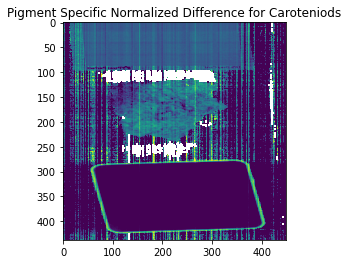

In [24]:
plt.imshow(pscar, vmin=0.4,vmax=1)
plt.title("Pigment Specific Normalized Difference for Caroteniods")

## Double derivatives
- How does Chennu calls it? Spectrometric?

In [25]:
bands_vector[136]

'626.10'

In [26]:
target_data = np.load(derv_list[7])

In [27]:
t = 0.0 #threshold for shadows
target_data = (target_data > t) * target_data

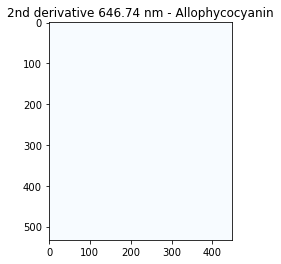

In [28]:
%matplotlib inline
# '574.59' possibly phycoerythrin
plt.title("2nd derivative 646.74 nm - Allophycocyanin")
#plt.imshow(target_data[:,:,106], cmap='Oranges_r')


# '596.90' possibly phycoerythrin
#plt.imshow(target_data[:,:,119], cmap='Purples')

# '646.74 nm' possibly allophycocyanin
plt.imshow(target_data[:,:,148], cmap='Blues')

# '688.06' Chlorophyll
#plt.imshow(target_data[:,:,172], cmap='Greens')

#'624.38' possibly phycocyanin
#plt.imshow(target_data[:,:,136], cmap='Reds')

#sp.imshow(target_data[:,:,161])